In [1]:
from qiskit import __version__
print(__version__)

2.0.1


In [2]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

We define the following function to implement a query gate for one of the four fundamental functions:

In [3]:
def deutsch_function(case: int):
    # This function generates a quantum circuit for one of the 4 functions
    # from one bit to one bit

    if case not in [1, 2, 3, 4]:
        raise ValueError("`case` must be 1, 2, 3, or 4.")

    f = QuantumCircuit(2)
    if case in [2, 3]:
        f.cx(0, 1)
    if case in [3, 4]:
        f.x(1)
    return f

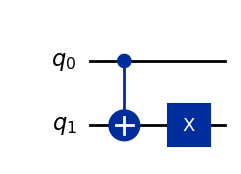

In [4]:
display(deutsch_function(3).draw(output="mpl"))

The following is the actual quantum circuit for Deutsch's algorithm:

In [5]:
def compile_circuit(function: QuantumCircuit):
    # Compiles a circuit for use in Deutsch's algorithm.

    n = function.num_qubits - 1
    qc = QuantumCircuit(n + 1, n)

    qc.x(n)
    qc.h(range(n + 1))

    qc.barrier()
    qc.compose(function, inplace=True)
    qc.barrier()

    qc.h(range(n))
    qc.measure(range(n), range(n))

    return qc

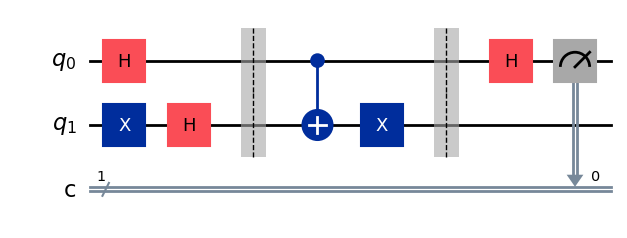

In [6]:
display(compile_circuit(deutsch_function(3)).draw(output="mpl"))

The following is a function that will run the circuit for a given function:

In [7]:
def deutsch_algorithm(function: QuantumCircuit):
    # Determine if a one-bit function is constant or balanced.

    qc = compile_circuit(function)

    result = AerSimulator().run(qc, shots=1, memory=True).result()
    measurements = result.get_memory()
    if measurements[0] == "0":
        return "constant"
    return "balanced"

In [10]:
for i in range(1,5):
    f = deutsch_function(i)
    display(deutsch_algorithm(f))

'constant'

'balanced'

'balanced'

'constant'